## Autoevaluación 1

###  Subespacios

#### Pregunta 1

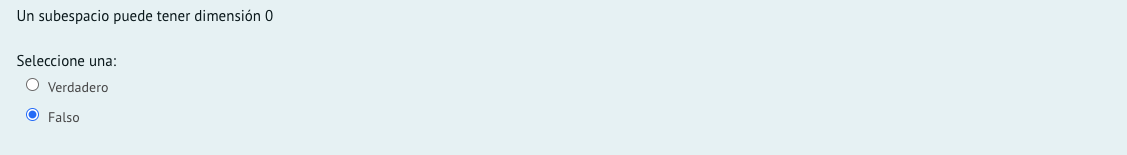

1.	Definición de dimensión de un subespacio
- La dimensión de un subespacio es la cantidad de vectores en una base de ese subespacio.
- Si un subespacio contiene solo el vector cero, no hay ningún vector linealmente independiente en él.
- En este caso, la dimensión es 0.
2.	El subespacio trivial
- El subespacio formado solo por el vector 0 se llama el subespacio trivial.
- Su única base posible es el conjunto vacío  \{\} .
- Como no hay vectores en la base, su dimensión es 0.
3.	Ejemplo en  R^3 
- El subespacio  \{(0,0,0)\}  es un subespacio de R^3 .
- No tiene vectores linealmente independientes.
- Su dimensión es 0.

### Independencia Lineal

# **Independencia Lineal y Dependencia Lineal**
Un conjunto de vectores \(\{ v_1, v_2, ..., v_n \}\) en un espacio vectorial es **linealmente independiente** (LI) si la única solución a la ecuación:

\[
c_1 v_1 + c_2 v_2 + ... + c_n v_n = 0
\]

es cuando todos los coeficientes \( c_1, c_2, ..., c_n \) son cero.

Si existe una combinación no trivial de los vectores que da el vector nulo, entonces los vectores son **linealmente dependientes** (LD). Esto significa que al menos uno de los vectores puede expresarse como combinación lineal de los otros.

En este ejercicio, tenemos un conjunto de vectores linealmente dependientes y queremos eliminar **exactamente un vector** para obtener un conjunto linealmente independiente. Para ello, analizaremos el rango de la matriz formada por los vectores.

In [1]:
import numpy as np
from scipy.linalg import lstsq

def encontrar_vectores_a_eliminar_por_LI(vectores):
    """
    Método 1: Encuentra todos los vectores que pueden eliminarse para que el conjunto restante sea LI,
    usando el criterio de rango de la matriz (Ax = 0).

    :param vectores: Lista de vectores (tuplas o listas).
    :return: Lista de vectores que pueden eliminarse.
    """
    matriz_original = np.array(vectores, dtype=np.float64)
    rango_original = np.linalg.matrix_rank(matriz_original)
    candidatos = []

    for i in range(len(vectores)):
        matriz_reducida = np.delete(matriz_original, i, axis=0)  # Eliminamos un vector
        rango_reducido = np.linalg.matrix_rank(matriz_reducida)

        # Si el rango de la matriz reducida es igual a la cantidad de vectores restantes, el conjunto es LI
        if rango_reducido == len(matriz_reducida):
            candidatos.append(vectores[i])

    return candidatos

def encontrar_vectores_a_eliminar_por_combinacion(vectores):
    """
    Método 2: Encuentra todos los vectores que pueden eliminarse verificando si un vector es combinación lineal de los demás.

    :param vectores: Lista de vectores (tuplas o listas).
    :return: Lista de vectores que pueden eliminarse.
    """
    candidatos = []

    for i in range(len(vectores)):
        vector_eliminado = np.array(vectores[i], dtype=np.float64)
        matriz_reducida = np.array([vectores[j] for j in range(len(vectores)) if j != i], dtype=np.float64).T  # Transpuesta para ecuaciones

        # Verificar que la matriz reducida tenga rango suficiente para encontrar soluciones únicas
        if np.linalg.matrix_rank(matriz_reducida) < len(matriz_reducida[0]):
            continue  # Si la matriz reducida no tiene rango completo, seguimos con otro vector

        try:
            # Resolver el sistema Ax = b
            coeficientes, residuo, rango, singular_values = lstsq(matriz_reducida, vector_eliminado)

            # Verificar si el vector eliminado es combinación exacta de los otros
            if np.linalg.norm(matriz_reducida @ coeficientes - vector_eliminado) < 1e-6:  
                candidatos.append(vectores[i])  # Este es un vector dependiente
        except np.linalg.LinAlgError:
            continue  # Si el sistema no tiene solución, pasamos al siguiente

    return candidatos

#### Pregunta 2

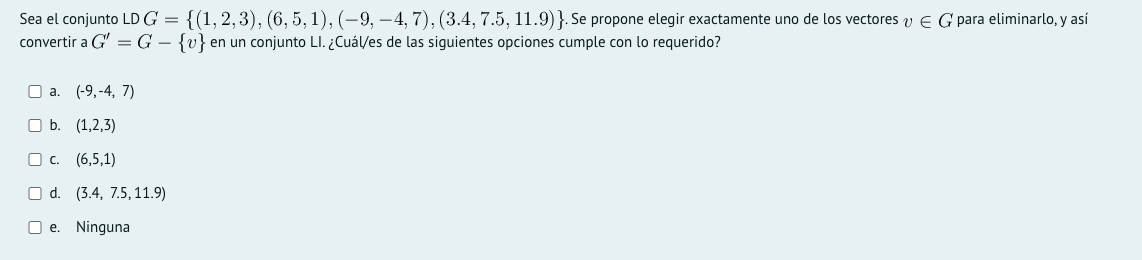

In [2]:
# Conjunto de vectores
vectores = [
    (1, 2, 3),
    (6, 5, 1),
    (-9, -4, 7),
    (3.4, 7.5, 11.9)
]

# Aplicar ambos métodos corregidos
vectores_LI = encontrar_vectores_a_eliminar_por_LI(vectores)
vectores_combinacion = encontrar_vectores_a_eliminar_por_combinacion(vectores)

# 🔹 Resultados corregidos
print("Método 1 (Rango - Ax = 0): Vectores que pueden eliminarse para obtener un conjunto LI:")
print(vectores_LI)

print("\nMétodo 2 (Combinación lineal - Ax = b): Vectores que pueden eliminarse para obtener un conjunto LI:")
print(vectores_combinacion)

Método 1 (Rango - Ax = 0): Vectores que pueden eliminarse para obtener un conjunto LI:
[]

Método 2 (Combinación lineal - Ax = b): Vectores que pueden eliminarse para obtener un conjunto LI:
[]


#### Pregunta 3

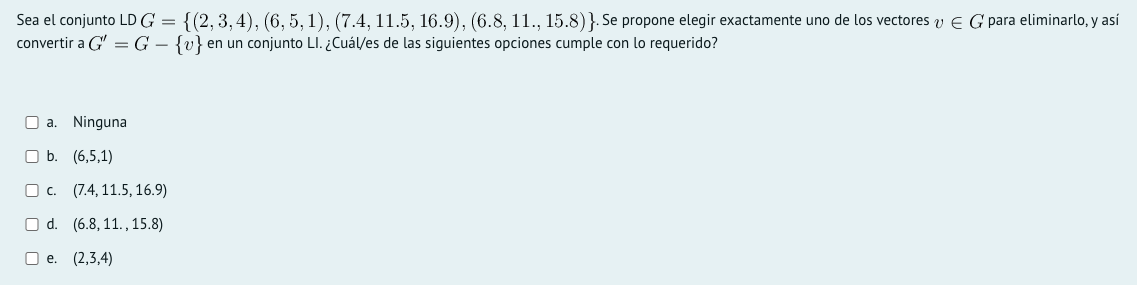

In [3]:
# Conjunto de vectores
vectores = [
    (2, 3, 4),
    (6, 5, 1),
    (7.4, 11.5, 16.9),
    (6.8, 11, 15.8)
]

# Aplicar ambos métodos revisados
vectores_LI = encontrar_vectores_a_eliminar_por_LI(vectores)
vectores_combinacion = encontrar_vectores_a_eliminar_por_combinacion(vectores)

# 🔹 Resultados
print("Método 1 (Rango - Ax = 0): Vectores que pueden eliminarse para obtener un conjunto LI:")
print(vectores_LI)

print("\nMétodo 2 (Combinación lineal - Ax = b): Vectores que pueden eliminarse para obtener un conjunto LI:")
print(vectores_combinacion)

Método 1 (Rango - Ax = 0): Vectores que pueden eliminarse para obtener un conjunto LI:
[(2, 3, 4), (6, 5, 1), (6.8, 11, 15.8)]

Método 2 (Combinación lineal - Ax = b): Vectores que pueden eliminarse para obtener un conjunto LI:
[(2, 3, 4), (6, 5, 1), (6.8, 11, 15.8)]


### Base y Dimesíon

In [4]:
import numpy as np

def calcular_base_y_dimension(vectores):
    """
    Calcula una base y la dimensión de un espacio vectorial a partir de un conjunto de vectores.
    
    :param vectores: Lista de vectores (listas o tuplas).
    :return: Base (lista de vectores) y dimensión del espacio vectorial.
    """
    # Convertir los vectores a una matriz de NumPy
    matriz = np.array(vectores, dtype=np.float64)

    # Realizar reducción a la forma escalonada por eliminación de Gauss
    matriz_reducida = np.linalg.qr(matriz)[1]  # Usamos QR para encontrar una base

    # Determinar los vectores LI eliminando filas con solo ceros
    base = []
    for fila in matriz_reducida:
        if not np.allclose(fila, 0):  # Si la fila no es completamente cero
            base.append(fila)

    # La cantidad de vectores en la base es la dimensión del espacio
    dimension = len(base)

    return base, dimension

In [6]:
# 🔹 Ejemplo de uso con un conjunto de vectores en R^3
vectores = [
    (1, 2, 3),
    (2, 4, 6),
    (3, 6, 9),
    (4, 5, 6)
]

# Aplicar la función
base, dimension = calcular_base_y_dimension(vectores)

# 🔹 Mostrar resultados
print("Base del espacio vectorial:")
for v in base:
    print(v)

print("\nDimensión del espacio vectorial:", dimension)

Base del espacio vectorial:
[ -5.47722558  -8.76356092 -12.04989627]
[ 0.         -2.04939015 -4.09878031]

Dimensión del espacio vectorial: 2


#### Pregunta 4
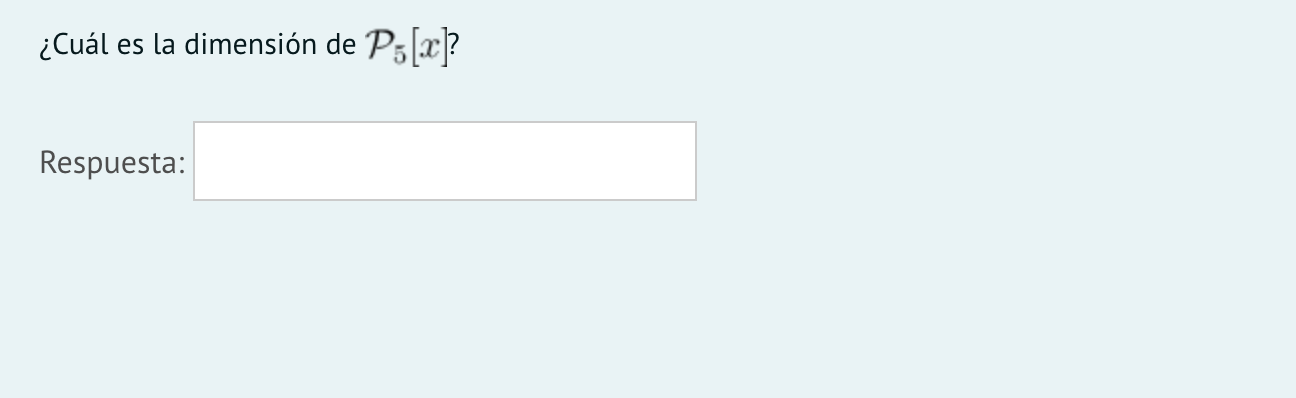

La dimensión del espacio de polinomios de grado a lo sumo 5, denotado como  P_5[x] , es 6.

Explicación

El espacio  P_5[x]  está formado por todos los polinomios de la forma:

p(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4 + a_5x^5

donde los coeficientes  a_0, a_1, a_2, a_3, a_4, a_5  son números reales (o de otro campo en consideración).

-	Una base canónica para  P_5[x]  es el conjunto:

\{ 1, x, x^2, x^3, x^4, x^5 \}

-    Este conjunto tiene 6 elementos, por lo que la dimensión de  P_5[x]  es 6.

**Respuesta correcta: 6 ✅**

#### Pregunta 5

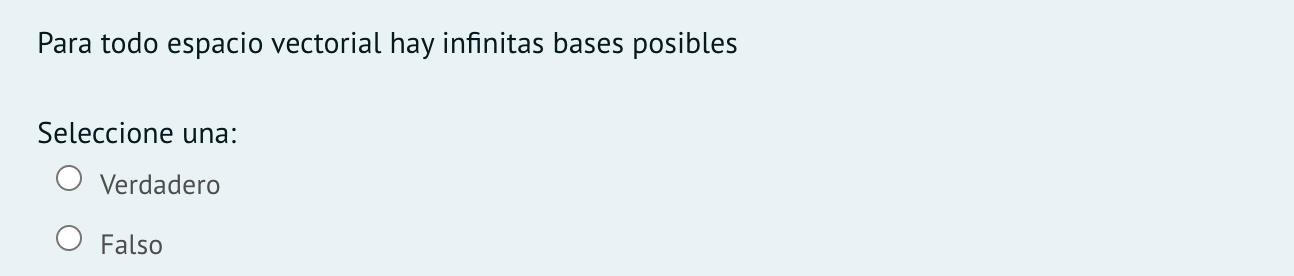

**Verdadero:** A pesar de que la dimensión de un espacio es única, hay infinitas maneras de elegir un conjunto de vectores LI para formar una base.

### Rango y Nulidad

In [9]:
import numpy as np

def calcular_rango_matriz(matriz):
    """
    Calcula el rango de una matriz aplicando eliminación de Gauss.
    
    :param matriz: Lista de listas o array de NumPy representando la matriz.
    :return: Rango de la matriz.
    """
    matriz_np = np.array(matriz, dtype=np.float64)
    rango = np.linalg.matrix_rank(matriz_np)  # Calcula el rango usando NumPy

    return int(rango)

#### Pregunta 6
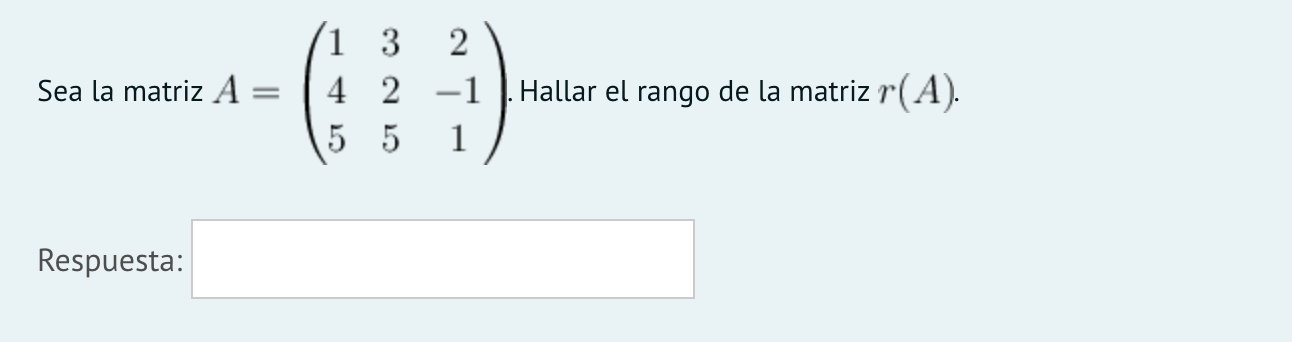

In [10]:
# 🔹 Matriz del problema
A = [
    [1, 3, 2],
    [4, 2, -1],
    [5, 5, 1]
]

# Calcular el rango
rango_A = calcular_rango_matriz(A)

# 🔹 Mostrar el resultado
rango_A

2

#### Pregunta 7

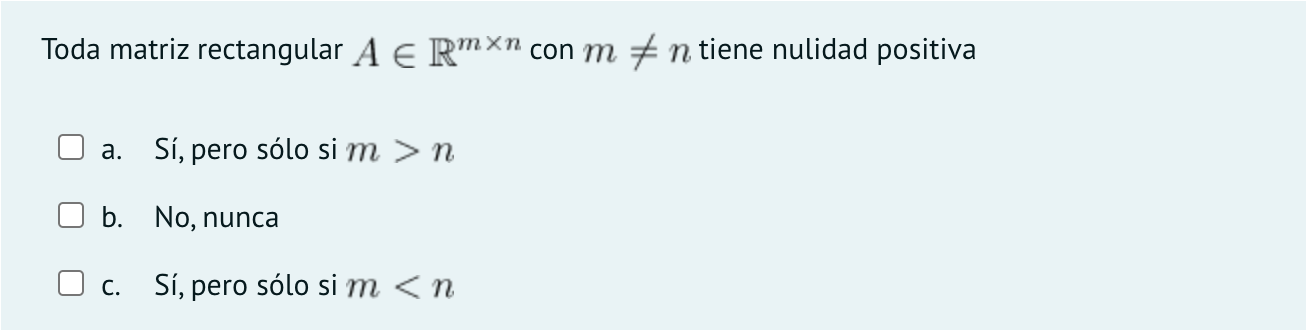

La nulidad de una matriz  A  se define como:

*Nulidad(A) = n - r(A)*

donde:

-  n  es el número de columnas de la matriz  A .

- r(A)  es el rango de  A , es decir, el número de columnas linealmente independientes.

Caso 1:  m > n 

- Cuando hay más filas que columnas ( m > n ), la matriz tiene más ecuaciones que incógnitas.

- En este caso, el sistema puede ser sobredeterminado, lo que no garantiza una solución con variables libres.

- La nulidad puede ser cero si las columnas son LI.

🔹 Conclusión: NO necesariamente hay nulidad positiva.

Caso 2:  m < n 

- Cuando hay más columnas que filas ( m < n ), la matriz tiene más incógnitas que ecuaciones.

- Esto significa que siempre habrá al menos una columna dependiente.

- Siempre hay variables libres, lo que implica que la nulidad es positiva.

🔹 Conclusión: La nulidad es siempre positiva cuando  m < n .